# All the information is on the task(master fan wiki)

In this notebook we try to use Python's BeautifulSoup module to scrape the wording of all the tasks from series 15 of the popular TV show Taskmaster from the fan wiki:

https://taskmaster.fandom.com/wiki/Series_15

with a view to analysing them.

In [1]:
# Ususal uploads

from bs4 import BeautifulSoup
import requests
import numpy as np

from wordcloud import WordCloud
import plotly.express as px
from pprint import pprint
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pandas as pd

In [2]:
url = 'https://taskmaster.fandom.com/wiki/Series_15'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs sse-variant" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Series 15 | Taskmaster Wiki | Fandom</title>
<script>document.documentElement.className="client-js sse-variant";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0745ed085fd0213611633ab4e5bf981b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Series_15","wgTitle":"Series 15","wgCurRevisionId":17370,"wgRevisionId":17370,"wgArticleId":431,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Series"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Series_15","wgRelevan

In [6]:
all_starts = list(soup.find_all("tr", class_='tmtablerow'))
len(all_starts)

58

In [7]:
#Putting them all in a single list

all_tasks = []
for i in range(len(all_starts)):
    if len(list(all_starts[i])) > 2:
        all_tasks.append(str(list(all_starts[i])[3]))
    else:
        all_tasks.append(str(list(all_starts[i])[1]))
    
            
pprint(all_tasks)

['<td><b>Prize:</b> Most dependable thing that weighs about 1kg.\n</td>',
 '<td>Have the best first dance at a wedding with Alex. You can choose '
 'whatever music you want, but must be wearing these headphones throughout. '
 'Your first dance must last no more than a minute.\n'
 '</td>',
 '<td>Completely unwind this ball of string. Your time started when you said '
 "Alex's name.\n"
 '</td>',
 '<td><small><i><b>Back:</b> Put a neat ball of string on the cushion. You do '
 'not have to unwind the ball of string.</i></small>\n'
 '</td>',
 '<td>Get all the rubber rings on your bargepole. You may not touch the '
 'bargepole or rubber rings at any point.\n'
 '</td>',
 '<td><b>Live:</b> Throw your items into your bucket. You must select one item '
 'when Alex blows his whistle. You must then throw that item when Alex blows '
 'his whistle again. If your bucket falls, you are disqualified. You must stay '
 'on your spot and you must not move your spot.\n'
 '</td>',
 '<td><b>Prize:</b> The ob

In [ ]:
for i in range(58):
    if 'solo' in all_tasks[i]:
        print(i)

In [8]:
all_tasks[3]

'<td><small><i><b>Back:</b> Put a neat ball of string on the cushion. You do not have to unwind the ball of string.</i></small>\n</td>'

In [9]:
all_tasks[57]

'<td>Scream the loudest with your mouth closed.\n</td>'

In [ ]:
for i in range(len(all_tasks)):
    if 'instrument' in all_tasks[i]:
        print(i)

In [18]:
all_tasks[24]

'Play the instrument indicated by the light. Each time you play an instrument correctly, another will be added to the sequence until you make a mistake'

In [11]:
# Getting rid of the <td>s from the beinnings 

all_tasks = [task[4:] for task in all_tasks]
all_tasks

['<b>Prize:</b> Most dependable thing that weighs about 1kg.\n</td>',
 'Have the best first dance at a wedding with Alex. You can choose whatever music you want, but must be wearing these headphones throughout. Your first dance must last no more than a minute.\n</td>',
 "Completely unwind this ball of string. Your time started when you said Alex's name.\n</td>",
 '<small><i><b>Back:</b> Put a neat ball of string on the cushion. You do not have to unwind the ball of string.</i></small>\n</td>',
 'Get all the rubber rings on your bargepole. You may not touch the bargepole or rubber rings at any point.\n</td>',
 '<b>Live:</b> Throw your items into your bucket. You must select one item when Alex blows his whistle. You must then throw that item when Alex blows his whistle again. If your bucket falls, you are disqualified. You must stay on your spot and you must not move your spot.\n</td>',
 '<b>Prize:</b> The object which, whenever you look at it, makes you feel the weirdest.\n</td>',
 'Com

In [12]:
#Remove the stuff from the beginnings

for i in range(len(all_tasks)):
    if 'Prize:' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][14:]
    if 'Team Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][18:]
    if 'Team' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
    if 'Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
        
all_tasks

['Most dependable thing that weighs about 1kg.\n</td>',
 'Have the best first dance at a wedding with Alex. You can choose whatever music you want, but must be wearing these headphones throughout. Your first dance must last no more than a minute.\n</td>',
 "Completely unwind this ball of string. Your time started when you said Alex's name.\n</td>",
 '<small><i><b>Back:</b> Put a neat ball of string on the cushion. You do not have to unwind the ball of string.</i></small>\n</td>',
 'Get all the rubber rings on your bargepole. You may not touch the bargepole or rubber rings at any point.\n</td>',
 'Throw your items into your bucket. You must select one item when Alex blows his whistle. You must then throw that item when Alex blows his whistle again. If your bucket falls, you are disqualified. You must stay on your spot and you must not move your spot.\n</td>',
 'The object which, whenever you look at it, makes you feel the weirdest.\n</td>',
 'Compose a solo for this musician. The solo m

In [13]:
# Removing the stuff from the end

all_tasks = [task[:-7] for task in all_tasks]
all_tasks

['Most dependable thing that weighs about 1kg',
 'Have the best first dance at a wedding with Alex. You can choose whatever music you want, but must be wearing these headphones throughout. Your first dance must last no more than a minute',
 "Completely unwind this ball of string. Your time started when you said Alex's name",
 '<small><i><b>Back:</b> Put a neat ball of string on the cushion. You do not have to unwind the ball of string.</i></small',
 'Get all the rubber rings on your bargepole. You may not touch the bargepole or rubber rings at any point',
 'Throw your items into your bucket. You must select one item when Alex blows his whistle. You must then throw that item when Alex blows his whistle again. If your bucket falls, you are disqualified. You must stay on your spot and you must not move your spot',
 'The object which, whenever you look at it, makes you feel the weirdest',
 'Compose a solo for this musician. The solo must be original and less than 30 seconds long',
 "Make s

In [17]:
# Problem with Task 3

all_tasks[3] = all_tasks[3][23:-12]

In [ ]:
# Remove the stuff from the beinnings

#all_tasks = [task[4:] for task in all_tasks]
#all_tasks

In [19]:
# Issue with task 25

all_tasks[25] = 'The person who sounds the least worst'
all_tasks[25]

'The person who sounds the least worst'

In [21]:
# Issue with task 28

all_tasks[28] = "Say how many things you stuffed in your teammate's outfit. If you're correct, your points are doubled. If you're wrong, the other team gets your points"

In [22]:
all_tasks[28]

"Say how many things you stuffed in your teammate's outfit. If you're correct, your points are doubled. If you're wrong, the other team gets your points"

## The NLP stuff

In [23]:
tasks_split = [task.split() for task in all_tasks]
pprint(tasks_split)

[['Most', 'dependable', 'thing', 'that', 'weighs', 'about', '1kg'],
 ['Have',
  'the',
  'best',
  'first',
  'dance',
  'at',
  'a',
  'wedding',
  'with',
  'Alex.',
  'You',
  'can',
  'choose',
  'whatever',
  'music',
  'you',
  'want,',
  'but',
  'must',
  'be',
  'wearing',
  'these',
  'headphones',
  'throughout.',
  'Your',
  'first',
  'dance',
  'must',
  'last',
  'no',
  'more',
  'than',
  'a',
  'minute'],
 ['Completely',
  'unwind',
  'this',
  'ball',
  'of',
  'string.',
  'Your',
  'time',
  'started',
  'when',
  'you',
  'said',
  "Alex's",
  'name'],
 ['Put',
  'a',
  'neat',
  'ball',
  'of',
  'string',
  'on',
  'the',
  'cushion.',
  'You',
  'do',
  'not',
  'have',
  'to',
  'unwind',
  'the',
  'ball',
  'of',
  'string'],
 ['Get',
  'all',
  'the',
  'rubber',
  'rings',
  'on',
  'your',
  'bargepole.',
  'You',
  'may',
  'not',
  'touch',
  'the',
  'bargepole',
  'or',
  'rubber',
  'rings',
  'at',
  'any',
  'point'],
 ['Throw',
  'your',
  'items'

In [24]:
task_words = []
for task in tasks_split:
    task_words += task

task_words

['Most',
 'dependable',
 'thing',
 'that',
 'weighs',
 'about',
 '1kg',
 'Have',
 'the',
 'best',
 'first',
 'dance',
 'at',
 'a',
 'wedding',
 'with',
 'Alex.',
 'You',
 'can',
 'choose',
 'whatever',
 'music',
 'you',
 'want,',
 'but',
 'must',
 'be',
 'wearing',
 'these',
 'headphones',
 'throughout.',
 'Your',
 'first',
 'dance',
 'must',
 'last',
 'no',
 'more',
 'than',
 'a',
 'minute',
 'Completely',
 'unwind',
 'this',
 'ball',
 'of',
 'string.',
 'Your',
 'time',
 'started',
 'when',
 'you',
 'said',
 "Alex's",
 'name',
 'Put',
 'a',
 'neat',
 'ball',
 'of',
 'string',
 'on',
 'the',
 'cushion.',
 'You',
 'do',
 'not',
 'have',
 'to',
 'unwind',
 'the',
 'ball',
 'of',
 'string',
 'Get',
 'all',
 'the',
 'rubber',
 'rings',
 'on',
 'your',
 'bargepole.',
 'You',
 'may',
 'not',
 'touch',
 'the',
 'bargepole',
 'or',
 'rubber',
 'rings',
 'at',
 'any',
 'point',
 'Throw',
 'your',
 'items',
 'into',
 'your',
 'bucket.',
 'You',
 'must',
 'select',
 'one',
 'item',
 'when',
 'Al

In [25]:
tasks_lower = [task.lower() for task in task_words]
tasks_lower

['most',
 'dependable',
 'thing',
 'that',
 'weighs',
 'about',
 '1kg',
 'have',
 'the',
 'best',
 'first',
 'dance',
 'at',
 'a',
 'wedding',
 'with',
 'alex.',
 'you',
 'can',
 'choose',
 'whatever',
 'music',
 'you',
 'want,',
 'but',
 'must',
 'be',
 'wearing',
 'these',
 'headphones',
 'throughout.',
 'your',
 'first',
 'dance',
 'must',
 'last',
 'no',
 'more',
 'than',
 'a',
 'minute',
 'completely',
 'unwind',
 'this',
 'ball',
 'of',
 'string.',
 'your',
 'time',
 'started',
 'when',
 'you',
 'said',
 "alex's",
 'name',
 'put',
 'a',
 'neat',
 'ball',
 'of',
 'string',
 'on',
 'the',
 'cushion.',
 'you',
 'do',
 'not',
 'have',
 'to',
 'unwind',
 'the',
 'ball',
 'of',
 'string',
 'get',
 'all',
 'the',
 'rubber',
 'rings',
 'on',
 'your',
 'bargepole.',
 'you',
 'may',
 'not',
 'touch',
 'the',
 'bargepole',
 'or',
 'rubber',
 'rings',
 'at',
 'any',
 'point',
 'throw',
 'your',
 'items',
 'into',
 'your',
 'bucket.',
 'you',
 'must',
 'select',
 'one',
 'item',
 'when',
 'al

In [26]:
tasks_no_punc = []

for word in tasks_lower:
    for punctuation in string.punctuation:
        word = word.replace(punctuation, '')
    tasks_no_punc.append(word)
        
tasks_no_punc

['most',
 'dependable',
 'thing',
 'that',
 'weighs',
 'about',
 '1kg',
 'have',
 'the',
 'best',
 'first',
 'dance',
 'at',
 'a',
 'wedding',
 'with',
 'alex',
 'you',
 'can',
 'choose',
 'whatever',
 'music',
 'you',
 'want',
 'but',
 'must',
 'be',
 'wearing',
 'these',
 'headphones',
 'throughout',
 'your',
 'first',
 'dance',
 'must',
 'last',
 'no',
 'more',
 'than',
 'a',
 'minute',
 'completely',
 'unwind',
 'this',
 'ball',
 'of',
 'string',
 'your',
 'time',
 'started',
 'when',
 'you',
 'said',
 'alexs',
 'name',
 'put',
 'a',
 'neat',
 'ball',
 'of',
 'string',
 'on',
 'the',
 'cushion',
 'you',
 'do',
 'not',
 'have',
 'to',
 'unwind',
 'the',
 'ball',
 'of',
 'string',
 'get',
 'all',
 'the',
 'rubber',
 'rings',
 'on',
 'your',
 'bargepole',
 'you',
 'may',
 'not',
 'touch',
 'the',
 'bargepole',
 'or',
 'rubber',
 'rings',
 'at',
 'any',
 'point',
 'throw',
 'your',
 'items',
 'into',
 'your',
 'bucket',
 'you',
 'must',
 'select',
 'one',
 'item',
 'when',
 'alex',
 'b

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
tasks_no_stop = [word for word in tasks_no_punc if word not in stop_words]

In [29]:
len(tasks_lower)

1379

In [30]:
len(tasks_no_stop)

727

In [31]:
# Lemmatizing

from nltk.stem import WordNetLemmatizer

# Lemmatizing the verbs
task_verb_lem = [
    WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
    for word in tasks_no_stop
]

task_verb_lem

['dependable',
 'thing',
 'weigh',
 '1kg',
 'best',
 'first',
 'dance',
 'wed',
 'alex',
 'choose',
 'whatever',
 'music',
 'want',
 'must',
 'wear',
 'headphones',
 'throughout',
 'first',
 'dance',
 'must',
 'last',
 'minute',
 'completely',
 'unwind',
 'ball',
 'string',
 'time',
 'start',
 'say',
 'alexs',
 'name',
 'put',
 'neat',
 'ball',
 'string',
 'cushion',
 'unwind',
 'ball',
 'string',
 'get',
 'rubber',
 'ring',
 'bargepole',
 'may',
 'touch',
 'bargepole',
 'rubber',
 'ring',
 'point',
 'throw',
 'items',
 'bucket',
 'must',
 'select',
 'one',
 'item',
 'alex',
 'blow',
 'whistle',
 'must',
 'throw',
 'item',
 'alex',
 'blow',
 'whistle',
 'bucket',
 'fall',
 'disqualify',
 'must',
 'stay',
 'spot',
 'must',
 'move',
 'spot',
 'object',
 'whenever',
 'look',
 'make',
 'feel',
 'weirdest',
 'compose',
 'solo',
 'musician',
 'solo',
 'must',
 'original',
 'less',
 '30',
 'second',
 'long',
 'make',
 'something',
 'look',
 'like',
 'musicians',
 'musical',
 'instrument',
 'm

In [32]:
tasks_final = [
    WordNetLemmatizer().lemmatize(word, pos = "n") # n --> nouns
    for word in task_verb_lem
]

tasks_final

['dependable',
 'thing',
 'weigh',
 '1kg',
 'best',
 'first',
 'dance',
 'wed',
 'alex',
 'choose',
 'whatever',
 'music',
 'want',
 'must',
 'wear',
 'headphone',
 'throughout',
 'first',
 'dance',
 'must',
 'last',
 'minute',
 'completely',
 'unwind',
 'ball',
 'string',
 'time',
 'start',
 'say',
 'alexs',
 'name',
 'put',
 'neat',
 'ball',
 'string',
 'cushion',
 'unwind',
 'ball',
 'string',
 'get',
 'rubber',
 'ring',
 'bargepole',
 'may',
 'touch',
 'bargepole',
 'rubber',
 'ring',
 'point',
 'throw',
 'item',
 'bucket',
 'must',
 'select',
 'one',
 'item',
 'alex',
 'blow',
 'whistle',
 'must',
 'throw',
 'item',
 'alex',
 'blow',
 'whistle',
 'bucket',
 'fall',
 'disqualify',
 'must',
 'stay',
 'spot',
 'must',
 'move',
 'spot',
 'object',
 'whenever',
 'look',
 'make',
 'feel',
 'weirdest',
 'compose',
 'solo',
 'musician',
 'solo',
 'must',
 'original',
 'le',
 '30',
 'second',
 'long',
 'make',
 'something',
 'look',
 'like',
 'musician',
 'musical',
 'instrument',
 'mime',

## Word Count

In [33]:
df = pd.DataFrame(tasks_final)
df

,0
0,dependable
1,thing
2,weigh
3,1kg
4,best
...,...
722,disqualify
723,scream
724,loudest
725,mouth


In [34]:
df[0].value_counts().nlargest(15)

must          33
thing         15
disqualify    13
may           11
egg           10
make           9
alex           9
point          9
spot           9
time           8
ball           8
potato         7
use            7
touch          7
wear           6
Name: 0, dtype: int64

## Word Cloud

In [35]:
from os import path
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
text = ''
for words in tasks_no_stop:
    text += words + ' '

text

'dependable thing weighs 1kg best first dance wedding alex choose whatever music want must wearing headphones throughout first dance must last minute completely unwind ball string time started said alexs name put neat ball string cushion unwind ball string get rubber rings bargepole may touch bargepole rubber rings point throw items bucket must select one item alex blows whistle must throw item alex blows whistle bucket falls disqualified must stay spot must move spot object whenever look makes feel weirdest compose solo musician solo must original less 30 seconds long make something looks like musicians musical instrument mime new solo may use musical instrument creation musical instrument build highest bridge middle red green balance potato middle bridge potato may anchored way anything touches red green must put everything back found tut go back drawing board achieve impressive effect single breath create recognisable picture animal back tshirt using equipment provided must stay spo

In [37]:
wordcloud = WordCloud(background_color="white").generate(text)

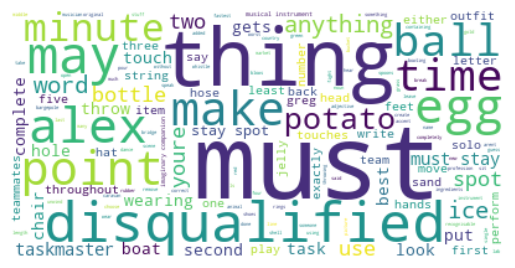

In [38]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()